# Areal Project

<div>
<img src="logo.jpg" width=150 ALIGN="left" border="20">
<h1> Starting Kit for preprocessed data</h1>
<br>This code was tested with <br>
Python 3.6.7 <br>
Created by Areal Team <br><br>
ALL INFORMATION, SOFTWARE, DOCUMENTATION, AND DATA ARE PROVIDED "AS-IS". The CDS, CHALEARN, AND/OR OTHER ORGANIZERS OR CODE AUTHORS DISCLAIM ANY EXPRESSED OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR ANY PARTICULAR PURPOSE, AND THE WARRANTY OF NON-INFRIGEMENT OF ANY THIRD PARTY'S INTELLECTUAL PROPERTY RIGHTS. IN NO EVENT SHALL AUTHORS AND ORGANIZERS BE LIABLE FOR ANY SPECIAL, 
INDIRECT OR CONSEQUENTIAL DAMAGES OR ANY DAMAGES WHATSOEVER ARISING OUT OF OR IN CONNECTION WITH THE USE OR PERFORMANCE OF SOFTWARE, DOCUMENTS, MATERIALS, PUBLICATIONS, OR INFORMATION MADE AVAILABLE FOR THE CHALLENGE. 
</div>

<div>
    <h2>Introduction </h2>
     <br>
Aerial imagery has been a primary source of geographic data for quite a long time. With technology progress, aerial imagery became really practical for remote sensing : the science of obtaining information about an object, area or phenomenon.
Nowadays, there are many uses of image recognition spanning from robotics/drone vision to autonomous driving vehicules or face detection.
<br>
In this challenge, we will use pre-processed data, coming from landscape images. The goal is to learn to differentiate common and uncommon landscapes such as a beach, a lake or a meadow.
    Data comes from part of the data set (NWPU-RESISC45) originally used in <a href="https://arxiv.org/pdf/1703.00121.pdf?fbclid=IwAR16qo-EX_Z05ZpxvWG8F-oBU0SlnY-3BPCWBVVOGPyJcVy7BBqCKjnsvJo">Remote Sensing Image Scene Classification</a>. This data set contains 45 categories while we only kept 13 out of them.

References and credits: 
Yuliya Tarabalka, Guillaume Charpiat, Nicolas Girard for the data sets presentation.<br>
Gong Cheng, Junwei Han, and Xiaoqiang Lu, for the original article on the chosen data set.
</div>

### Requirements 

Our code uses multiple libraries, so the next cell will install python's required dependencies (probably only possible on your personal computers). In case you don't want to, or are running in the competition's docker, you can comment it.

In [1]:
#!pip install --user -r requirements.txt

In [2]:
import numpy as np
import random
import re

In [3]:
model_dir = "sample_code_submission/"
result_dir = 'sample_result_submission/' 
problem_dir = 'ingestion_program/'  
score_dir = 'scoring_program/'

In [4]:
from sys import path; path.append(model_dir); path.append(problem_dir); path.append(score_dir);

<div>
    <h1> Step 1: Exploratory data analysis </h1>
<p>
We provide sample_data with the starting kit, but to prepare your submission, you must fetch the public_data from the challenge website and point to it.
</div>

<div>
<img src="CNN.png" width=800 align="center" border="20">
We used a special Convolutional Neural Network (CNN) already trained to recognize images in order to create the new data. To create it, we kept the form of the data at three-fourth in the CNN. <br>
This new form is highly similar to weights we can see in a classic neural network.
</div>

In [5]:
data_dir = '../public_data/'
data_name = 'Areal'

In [6]:
from ingestion_program.data_io import read_as_df
data = read_as_df(data_dir  + '/' + data_name)

Reading ../public_data//Areal_train from AutoML format
Number of examples = 5200
Number of features = 1024
        Class
0       beach
1   chaparral
2       cloud
3      desert
4      forest
5      island
6        lake
7      meadow
8    mountain
9       river
10    sea_ice
11   snowberg
12    wetland
Number of classes = 13


In [7]:
data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1016,feature_1017,feature_1018,feature_1019,feature_1020,feature_1021,feature_1022,feature_1023,feature_1024,target
0,0.106071,0.001777,0.004327,0.011661,0.015068,0.010906,0.019826,0.047200,0.009014,0.011369,...,0.035866,0.007674,0.011295,0.006992,0.035666,0.013637,0.054297,0.076698,0.084652,snowberg
1,0.069425,0.000921,0.018868,0.030748,0.019744,0.003433,0.031509,0.064145,0.043115,0.034331,...,0.025870,0.006954,0.072719,0.008778,0.031796,0.052533,0.026997,0.064874,0.023625,island
2,0.092052,0.000067,0.012185,0.021340,0.009253,0.010788,0.027914,0.043856,0.009098,0.015725,...,0.019264,0.007737,0.017554,0.004777,0.074484,0.019736,0.034742,0.062472,0.017112,forest
3,0.123751,0.002270,0.001138,0.042464,0.053743,0.016156,0.060952,0.077559,0.025709,0.034909,...,0.010575,0.006195,0.045711,0.003325,0.021387,0.053118,0.031510,0.088904,0.071321,island
4,0.095870,0.001628,0.006228,0.023276,0.009811,0.010350,0.119979,0.102470,0.018967,0.020871,...,0.004668,0.004444,0.009534,0.005907,0.168387,0.033255,0.003384,0.030591,0.015277,chaparral


In [8]:
data.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1015,feature_1016,feature_1017,feature_1018,feature_1019,feature_1020,feature_1021,feature_1022,feature_1023,feature_1024
count,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,...,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000
mean,0.121305,0.003328,0.013501,0.030555,0.023089,0.010967,0.027844,0.056652,0.023242,0.024799,...,0.014169,0.017468,0.011556,0.031167,0.007498,0.058065,0.035116,0.030386,0.042872,0.046598
std,0.037973,0.004477,0.012499,0.026116,0.016511,0.007922,0.020707,0.017747,0.016977,0.013746,...,0.018341,0.012645,0.008341,0.026558,0.004454,0.036262,0.017226,0.028423,0.037208,0.039547
min,0.040885,0.000000,0.000000,0.001291,0.000162,0.000000,0.000085,0.011526,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000013,0.000000,0.001182,0.003447,0.000000,0.000000,0.000041
25%,0.094630,0.000570,0.004334,0.013073,0.010800,0.004841,0.012771,0.044047,0.010448,0.015497,...,0.002266,0.008225,0.005766,0.013196,0.004551,0.031261,0.022756,0.009300,0.013570,0.017079
50%,0.114264,0.001831,0.009751,0.023053,0.019087,0.009393,0.023050,0.055262,0.019901,0.022586,...,0.007836,0.014361,0.009639,0.023177,0.007141,0.051499,0.031793,0.021113,0.032538,0.036452
75%,0.140604,0.004207,0.019060,0.038441,0.031554,0.015434,0.037107,0.067248,0.032125,0.031435,...,0.018554,0.023451,0.014995,0.040629,0.009895,0.076601,0.043574,0.042843,0.062371,0.065105
max,0.357318,0.061369,0.085685,0.227355,0.163444,0.063399,0.145499,0.138546,0.126265,0.115797,...,0.179975,0.099365,0.083410,0.329072,0.036173,0.236607,0.151923,0.211658,0.240984,0.286852


In [9]:
print(data.iloc[:, -1:])
X = data.iloc[:, :-1]
y = data.iloc[:, -1:]

         target
0      snowberg
1        island
2        forest
3        island
4     chaparral
5         beach
6        island
7        forest
8       wetland
9         river
10       island
11    chaparral
12        cloud
13         lake
14       meadow
15        beach
16        cloud
17         lake
18        cloud
19         lake
20     snowberg
21       forest
22      wetland
23        river
24     snowberg
25        river
26       desert
27        river
28      wetland
29       island
...         ...
5170    sea_ice
5171     desert
5172     meadow
5173  chaparral
5174     forest
5175   mountain
5176      beach
5177     meadow
5178     meadow
5179      river
5180   snowberg
5181   snowberg
5182  chaparral
5183   snowberg
5184    wetland
5185      cloud
5186     island
5187     desert
5188       lake
5189   snowberg
5190      cloud
5191      beach
5192     desert
5193     forest
5194     island
5195      beach
5196      cloud
5197     forest
5198  chaparral
5199      cloud

[5200 r

### Visualization of values

Most values are in the range (0, 5).

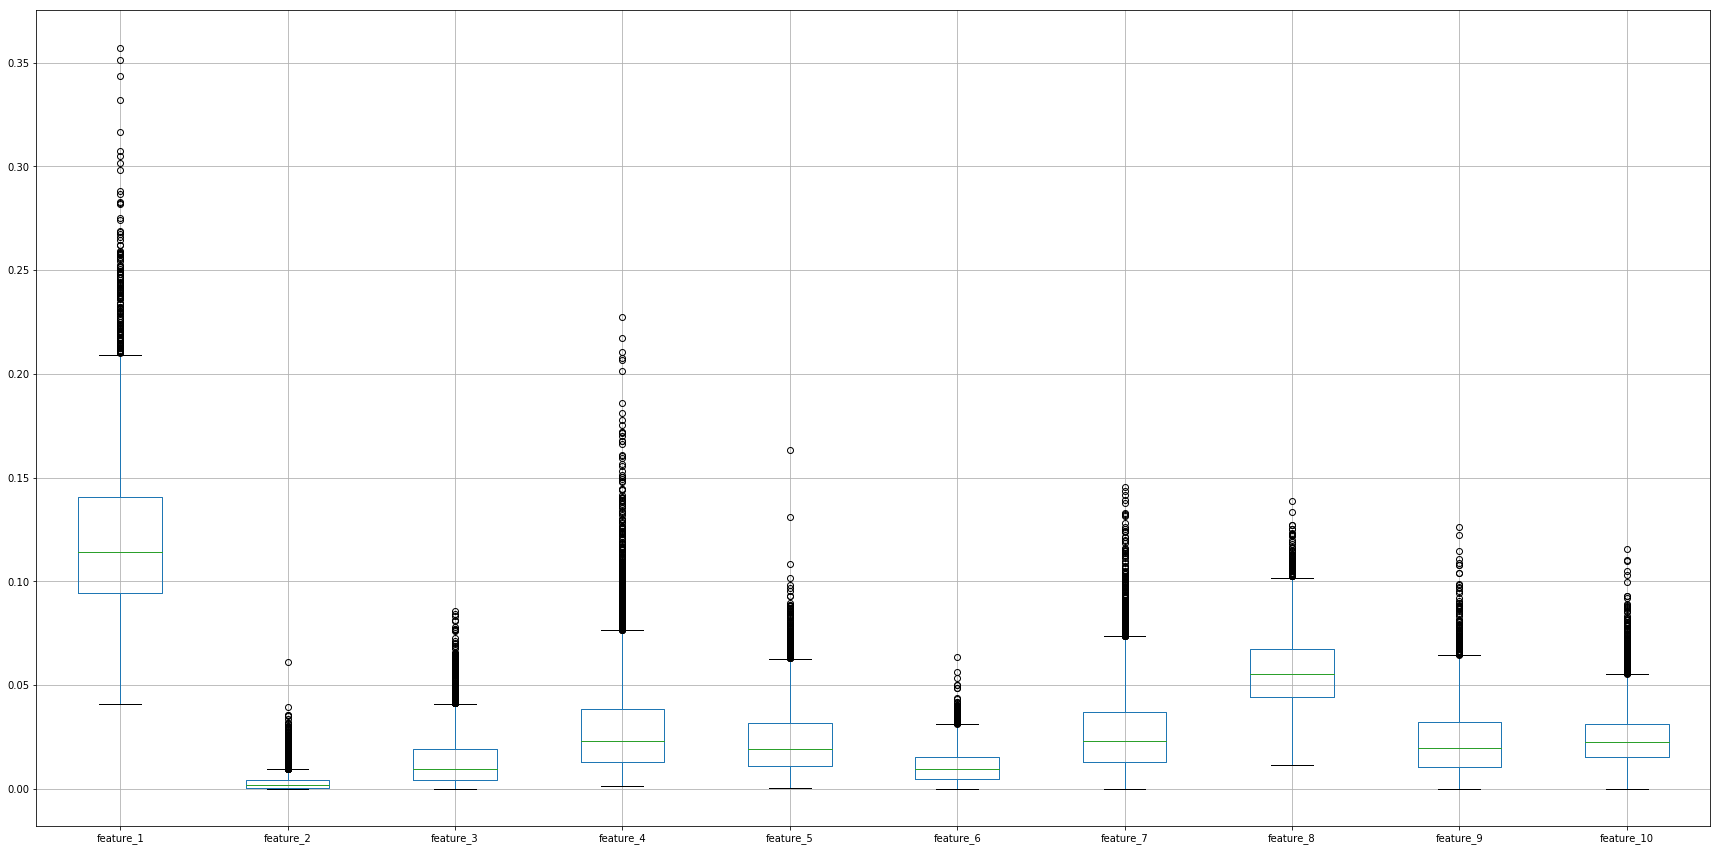

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(30,15))
#Plot values of first 10 features
data_plot=data.iloc[:,:10]
data_plot.boxplot()
plt.show()

### Visualisation as images

Although any human won't be able to make sense of those images, it is by far simpler and faster for computers to correctly recognize those "images" and assign them their correct classes.

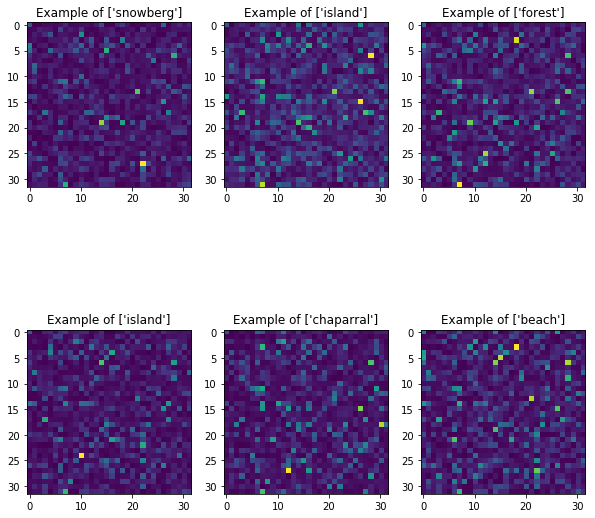

In [11]:
import matplotlib.image as mpimg

num_toshow = 6
fig, _axs = plt.subplots(nrows=2, ncols=3, figsize=(10,10))
fig.subplots_adjust(hspace=0.3)
axs = _axs.flatten()

for i in range(num_toshow):
    img = data.iloc[i].values[:-1].reshape(32, 32)
    label = data.values[i][-1:]
    axs[i].set_title('Example of {}'.format(label))
    axs[i].imshow(img.astype(float))

plt.show()

In [12]:
import seaborn as sns
sns.set()

data_corr = data.iloc[0:5, 0:5].corr(method='pearson')
#data_corr = data.corr(method='pearson')

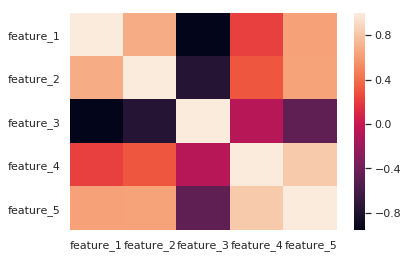

In [13]:
ax = sns.heatmap(data_corr)

# Step 2: Building a predictive model

Use DataManager to separate data for train, validation and test

In [14]:
from data_manager import DataManager
D = DataManager(data_name, data_dir)
print(D)

Info file found : /home/marc/Bureau/pprepro/public_data/Areal_public.info
DataManager : Areal
info:
	usage = Sample dataset Areal preprocessed data
	name = areal
	task = multiclass.classification
	target_type = Categorical
	feat_type = Numerical
	metric = accuracy
	time_budget = 12000
	feat_num = 1024
	target_num = 13
	label_num = 13
	train_num = 5200
	valid_num = 1950
	test_num = 1950
	has_categorical = 0
	has_missing = 0
	is_sparse = 0
	format = dense
data:
	X_train = array(5200, 1024)
	Y_train = array(5200, 1)
	X_valid = array(1950, 1024)
	Y_valid = array(0,)
	X_test = array(1950, 1024)
	Y_test = array(0,)
feat_type:	array(1024,)
feat_idx:	array(0,)



Get data and labels by calling D.data (DataManager.data)

In [15]:
X_train = D.data['X_train']
Y_train = D.data['Y_train']

The model is a simpler version of the decision tree algorithm of sklearn.

You can only change the parameter max_depth which has a default value of 5.

# Choix du model automatique :

In [16]:
from model import baselineModel
import model as mdl

M = baselineModel()

1° cas : recherche des meilleurs paramètres avec les images de base (SVC):
Correspondances graphique :

	0 --> {'C': 1}
	1 --> {'C': 10}
	2 --> {'C': 100}
Les meilleurs paramètres sont : {'C': 10}, qui donnent un score de : 0.895 (en 233 secondes)
2° cas : recherche des meilleurs paramètres avec les images de base (MLPClassifier):
Les meilleurs paramètres sont : {'max_iter': 1000, 'solver': 'lbfgs'}, qui donnent un score de : 0.887 (en 329 secondes)
Correspondances graphique :

	0 --> {'max_iter': 1000, 'solver': 'lbfgs'}
	1 --> {'max_iter': 1500, 'solver': 'lbfgs'}
	2 --> {'max_iter': 2000, 'solver': 'lbfgs'}
	3 --> {'max_iter': 2500, 'solver': 'lbfgs'}
	4 --> {'max_iter': 3000, 'solver': 'lbfgs'}
On sélectionne SVC !

3° cas : recherche des améliorations possibles de notre preprocessing (PCA):
Pour n_components = 128, on obtient un score de 0.895.
Pour n_components = 256, on obtient un score de 0.895.
Pour n_components = 384, on obtient un score de 0.896.
Pour n_components = 512, on 

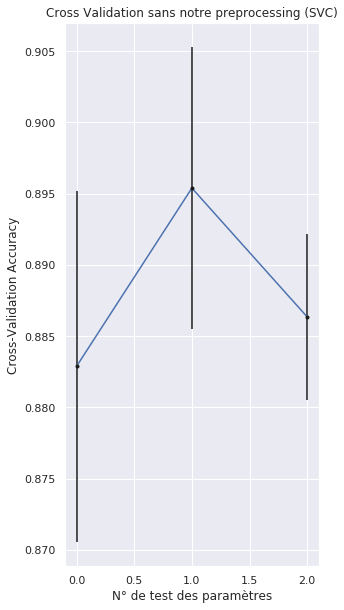

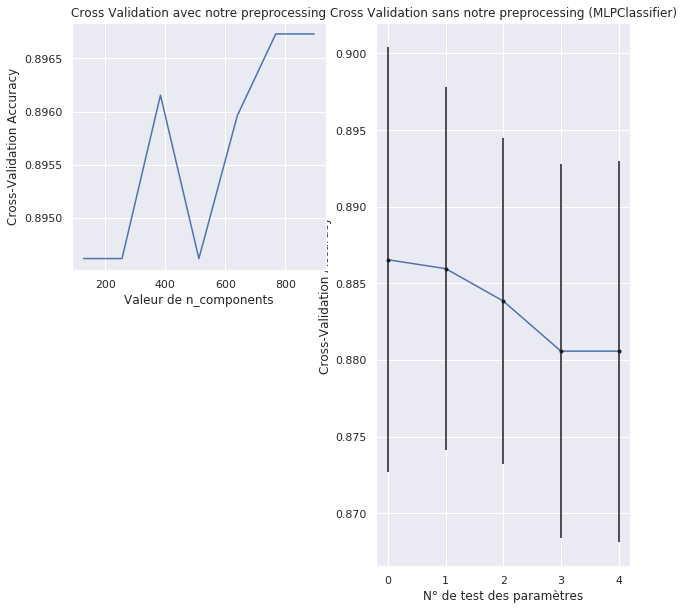

In [17]:
M = mdl.tests_auto(X_train, Y_train)

# Légende graphe :
En haut à gauche -> 1° Cas<br>
En bas à gauche -> 2° Cas<br>
En bas à droite -> 3° Cas<br>


#### Fit the model

Data as first argument, Labels as second, with .reshape(-1) to make sure that the array containing labels is flat and don't have multiple dimensions.

In [18]:
M.best_prepro = False
M.fit(X_train, Y_train.reshape(-1))

FIT: dim(X)= [5200, 1024]
FIT: dim(y)= [5200, 1]


In [19]:
Y_hat_train = M.predict(D.data['X_train'])
Y_hat_valid = M.predict(D.data['X_valid'])
Y_hat_test = M.predict(D.data['X_test'])

PREDICT: dim(X)= [5200, 1024]
PREDICT: dim(y)= [5200, 1]
PREDICT: dim(X)= [1950, 1024]
PREDICT: dim(y)= [1950, 1]
PREDICT: dim(X)= [1950, 1024]
PREDICT: dim(y)= [1950, 1]


In [20]:
# m.save(trained_model_name)                 
result_name = result_dir + data_name
from data_io import write
from data_io import mkdir
mkdir(result_dir)

write(result_name + '_train.predict', Y_hat_train)
write(result_name + '_valid.predict', Y_hat_valid)
write(result_name + '_test.predict', Y_hat_test)
!ls $result_name*

sample_result_submission/Areal_test.predict
sample_result_submission/Areal_train.predict
sample_result_submission/Areal_valid.predict


# Scoring predictions

In [21]:
from libscores import get_metric
metric_name, scoring_function = get_metric()
print('Using scoring metric:', metric_name)

Using scoring metric: accuracy


In [22]:
print('Ideal score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_train), "\n")

print("Scores with BaselineModel")
print('Training score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_hat_train))
if len(D.data['Y_valid'] > 0) and len(D.data['Y_test'] > 0):
    print('Validation score for the', metric_name, 'metric = %5.4f' % scoring_function(D.data['Y_valid'], Y_hat_valid))
    print('Test score for the', metric_name, 'metric = %5.4f' % scoring_function(D.data['Y_test'], Y_hat_test))

Ideal score for the accuracy metric = 1.0000 

Scores with BaselineModel
Training score for the accuracy metric = 0.9777


Keep in mind that the provided model is one that heavily overfits so you shouldn't look too much at the training score.

Using cross-validation (see a bit below) will give more significant results.

## Confusion matrix

Doesn't have much value on train with a 100% accuracy, but it can be good to look at if you change your model.

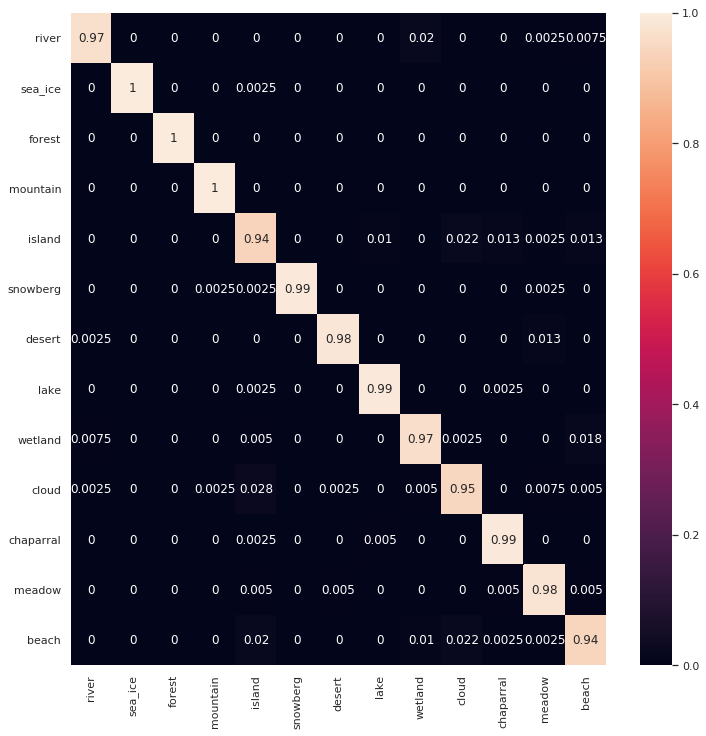

In [23]:
import pandas as pd
from sklearn.metrics import confusion_matrix

array = confusion_matrix(Y_train, Y_hat_train)
array = array.astype('float') / array.sum(axis=1)[:, np.newaxis]

cm = pd.DataFrame(array, index = set(list(data.target)), columns = set(list(data.target)))

plt.figure(figsize=(12, 12))
sns.heatmap(cm, annot=True)
plt.show()

# Cross-validation

Because validation and test labels should first not be available, we do cross validation to see our models quality

In [24]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

scores = cross_val_score(M, X_train, Y_train.ravel(), cv=5, scoring=make_scorer(scoring_function))
print('\nCV score (95 perc. CI): %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

FIT: dim(X)= [4160, 1024]
FIT: dim(y)= [4160, 1]
PREDICT: dim(X)= [1040, 1024]
PREDICT: dim(y)= [1040, 1]
FIT: dim(X)= [4160, 1024]
FIT: dim(y)= [4160, 1]
PREDICT: dim(X)= [1040, 1024]
PREDICT: dim(y)= [1040, 1]
FIT: dim(X)= [4160, 1024]
FIT: dim(y)= [4160, 1]
PREDICT: dim(X)= [1040, 1024]
PREDICT: dim(y)= [1040, 1]
FIT: dim(X)= [4160, 1024]
FIT: dim(y)= [4160, 1]
PREDICT: dim(X)= [1040, 1024]
PREDICT: dim(y)= [1040, 1]
FIT: dim(X)= [4160, 1024]
FIT: dim(y)= [4160, 1]
PREDICT: dim(X)= [1040, 1024]
PREDICT: dim(y)= [1040, 1]

CV score (95 perc. CI): 0.90 (+/- 0.02)


# Submission

## Example

Example needs to have python3 installed

Test to see whether submission with ingestion program is working

In [25]:
!python3 $problem_dir/ingestion.py $data_dir $result_dir $problem_dir $model_dir

Using input_dir: /home/marc/Bureau/pprepro/public_data
Using output_dir: /home/marc/Bureau/pprepro/starting_kit/sample_result_submission
Using program_dir: /home/marc/Bureau/pprepro/starting_kit/ingestion_program
Using submission_dir: /home/marc/Bureau/pprepro/starting_kit/sample_code_submission

========== Ingestion program version 6 ==========

************************************************
******** Processing dataset Areal ********
************************************************
========= Reading and converting data ==========
Info file found : /home/marc/Bureau/pprepro/public_data/Areal_public.info
========= Reading /home/marc/Bureau/pprepro/public_data/Areal_feat.type
[+] Success in  0.00 sec
========= Reading /home/marc/Bureau/pprepro/public_data/Areal_train.data
Replace missing values by 0 (slow, sorry)
[+] Success in  3.68 sec
========= Reading /home/marc/Bureau/pprepro/public_data/Areal_train.solution
[+] Success in  0.01 sec
========= Reading /home/marc/Bureau/pprepro/publ

### Test scoring program

In [26]:
scoring_output_dir = 'scoring_output'
!python3 $score_dir/score.py $data_dir $result_dir $scoring_output_dir

======= Set 1 (Areal_train): accuracy(set1_score)=0.977692307692 =======


# Prepare the submission

In [27]:
import datetime 
from data_io import zipdir
the_date = datetime.datetime.now().strftime("%y-%m-%d-%H-%M")
sample_code_submission = './sample_code_submission_prep_' + the_date + '.zip'
sample_result_submission = './sample_result_submission_prep_' + the_date + '.zip'
zipdir(sample_code_submission, model_dir)
zipdir(sample_result_submission, result_dir)
print("Submit one of these files:\n" + sample_code_submission + "\n" + sample_result_submission)

Submit one of these files:
./sample_code_submission_prep_19-04-14-22-08.zip
./sample_result_submission_prep_19-04-14-22-08.zip
